[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WCC-Engineering/ENGR240/blob/main/Class%20Demos%20and%20Activities/Week%203/worksheet3-1_template.ipynb)

#Worksheet 3.1 Bisection Method Progressive Implementation

The bisection method is a numerical technique for finding roots of a function, which are the values of $x$ where $f(x) = 0$. This algorithm works by repeatedly dividing an interval and selecting the subinterval where the function changes sign.

## How the Bisection Method Works

1. Start with an interval $[a, b]$ where $f(a)$ and $f(b)$ have opposite signs
2. Find the midpoint $c = \frac{a + b}{2}$
3. Evaluate $f(c)$
4. If $f(c) \approx 0$ (within tolerance), return $c$ as the root
5. If $f(a)$ and $f(c)$ have opposite signs, set $b = c$
6. Otherwise, set $a = c$
7. Repeat steps 2-6 until convergence or maximum iterations reached

In this notebook, we'll build up the bisection method through several versions with increasing complexity and functionality.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Version 1: Basic Implementation

Let's start with a bare-bones implementation of the bisection method with minimal error checking and no default values.

In [ ]:
def bisection_v1(f, a, b, tol, max_iter):
    """
    Basic bisection method for finding a root of f(x) = 0.

    Parameters:
    f : function
        The function for which we want to find the root
    a, b : float
        The interval [a, b] where we search for the root
    tol : float
        Tolerance for stopping criterion
    max_iter : int
        Maximum number of iterations

    Returns:
    float: The estimated root
    """
    # Evaluate function at interval endpoints
    fa = f(a)
    fb = f(b)

    # Check if the function changes sign in the interval
    if fa * fb > 0:
        raise ValueError("Function must have opposite signs at interval endpoints")

    # Initialize iteration counter and ea
    iter_count = 0
    ea = tol+1
    # Bisection loop
    while ea > tol and iter_count < max_iter:
        # Find midpoint
        c = (a + b) / 2
        fc = f(c)
        if c != 0:
            ea = abs((c-a)/c)
        # Check if we found the root exactly
        if fc == 0:
            return c, 0

        # Update interval
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        iter_count += 1

    # Return approximation of the root
    return c, ea

Let's test this basic implementation with a function that has no analytical solution: $2x^2 = e^{x/2} + 3$, which we'll rearrange as $f(x) = 2x^2 - e^{x/2} - 3 = 0$.

Root found: 1.6198339462280273
Approx relative error: 5.887481976945798e-07
Function value at root (residual): 2.6690812520158147e-06


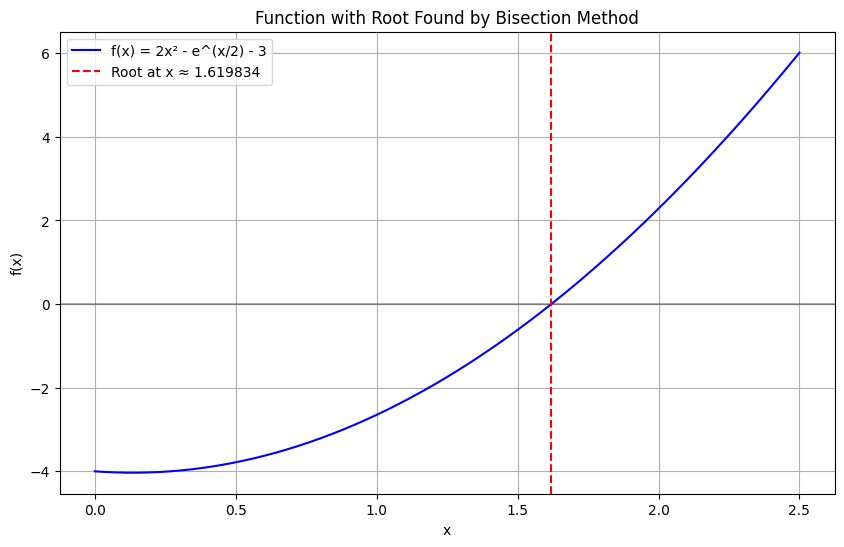

In [ ]:
def f1(x):
    """Function: f(x) = 2x^2 - e^(x/2) - 3"""
    return 2*x**2 - np.exp(x/2) - 3

# Find the positive root
root, approx_error = bisection_v1(f1, 1, 2, 1e-6, 100)
print(f"Root found: {root}")
print(f"Approx relative error: {approx_error}")
print(f"Function value at root (residual): {f1(root)}")

# Visualize the function and the root
x = np.linspace(0, 2.5, 1000)
y = f1(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = 2x² - e^(x/2) - 3')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=root, color='r', linestyle='--', label=f'Root at x ≈ {root:.6f}')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function with Root Found by Bisection Method')
plt.legend()
plt.show()

###Understanding the Algorithm
Work by hand to execute at least three iterations of the bisection method to solve for the root between a = 1 and b = 2.  You should be able to select appropriate brackets for each iteration by visual inspection of the figure above.  You might find it helpful to draw the brackets for each iteration on the figure above.  Enter the results of your hand calculation in the following table.

|Iteration|a|b|c|e<sub>a</sub>|f(c)|
|:---:|---|---|---|---|---|
|1|---|---|---|---|---|
|2|---|---|---|---|---|
|3|---|---|---|---|---|
|4|---|---|---|---|---|

## Version 2: Improved Implementation with Validation and Defaults

Now, let's enhance the bisection method by adding:
1. Input parameter validation
2. Default values for tolerance and maximum iterations
3. Better return values including iteration count and error estimate

In [ ]:
def bisection_v2(f, a, b, tol=1e-6, max_iter=100):
    """
    Improved bisection method with input validation and default parameters.

    Parameters:
    f : function
        The function for which we want to find the root
    a, b : float
        The interval [a, b] where we search for the root
    tol : float, optional
        Tolerance for stopping criterion (default: 1e-6)
    max_iter : int, optional
        Maximum number of iterations (default: 100)

    Returns:
    tuple: (root, iterations, error_estimate)
        - root: The estimated root
        - iterations: Number of iterations performed
        - error_estimate: Estimated error (half of the final interval width)
    """
    # Input validation
    if not callable(f):
        raise TypeError("f must be a callable function")

    if not (np.isscalar(a) and np.isscalar(b)):
        raise TypeError("a and b must be scalar values")

    if a >= b:
        raise ValueError("a must be less than b")

    if tol <= 0:
        raise ValueError("Tolerance must be positive")

    if max_iter <= 0 or not isinstance(max_iter, int):
        raise ValueError("Maximum iterations must be a positive integer")

    # Evaluate function at interval endpoints
    fa = f(a)
    fb = f(b)

    # Check if one of the endpoints is a root
    if fa == 0:
        return a, 0, 0
    if fb == 0:
        return b, 0, 0

    # Check if the function changes sign in the interval
    if fa * fb > 0:
        raise ValueError(f"Function must have opposite signs at interval endpoints: f({a}) = {fa}, f({b}) = {fb}")

    # Initialize iteration counter and ea
    iter_count = 0
    ea = tol + 1
    # Bisection loop
    while ea > tol and iter_count < max_iter:
        # Find midpoint
        c = (a + b) / 2
        fc = f(c)
        if c != 0:
            ea = abs((c-a)/c)
        # Check if we found the root exactly
        if fc == 0:
            return c, iter_count + 1, 0

        # Update interval
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        iter_count += 1

    return c, iter_count, ea

Let's test this improved implementation with the same function and see the additional information it provides.

In [ ]:
# Test with default parameters
root, iterations, error = bisection_v2(f1, 1, 2)
print(f"Root found: {root}")
print(f"Function value at root (residual): {f1(root)}")
print(f"Iterations performed: {iterations}")
print(f"Approximate relative error: {error}")

# Test with custom parameters
root2, iterations2, error2 = bisection_v2(f1, 1, 2, tol=1e-10, max_iter=50)
print(f"\nWith higher precision:")
print(f"Root found: {root2}")
print(f"Function value at root: {f1(root2)}")
print(f"Iterations performed: {iterations2}")
print(f"Approximate relative error: {error2}")

Root found: 1.6198339462280273
Function value at root (residual): 2.6690812520158147e-06
Iterations performed: 20
Approximate relative error: 5.887481976945798e-07

With higher precision:
Root found: 1.6198334478540346
Function value at root: 5.2167603570296706e-11
Iterations performed: 33
Approximate relative error: 7.186869858821755e-11


### Comparing Version 1 and Version 2

Key improvements in Version 2:

1. **Default parameters**: Users can omit tolerance and max_iter parameters
2. **Input validation**: Catches problems early with clear error messages
3. **Enhanced return values**: Returns not just the root but also number of iterations and error estimate
4. **Edge case handling**: Special cases like roots at endpoints are handled correctly
5. **Better error messages**: More informative error messages with function values

## Version 3: General Purpose Implementation with *args

Now, let's make the function more flexible by allowing additional parameters to be passed to the function we're finding the root of. This is important for parametric functions where we need to pass additional values to the function.

In [ ]:
def bisection_v3(f, a, b, tol=1e-6, max_iter=100, *args):
    """
    General purpose bisection method with *args support.

    Parameters:
    f : function
        The function for which we want to find the root
    a, b : float
        The interval [a, b] where we search for the root
    tol : float, optional
        Tolerance for stopping criterion (default: 1e-6)
    max_iter : int, optional
        Maximum number of iterations (default: 100)
    *args : additional arguments
        Additional arguments to pass to function f

    Returns:
    tuple: (root, iterations, error_estimate, converged)
        - root: The estimated root
        - iterations: Number of iterations performed
        - error_estimate: Estimated error (half of the final interval width)
        - converged: Boolean indicating whether the method converged
    """
    # Input validation
    if not callable(f):
        raise TypeError("f must be a callable function")

    if not (np.isscalar(a) and np.isscalar(b)):
        raise TypeError("a and b must be scalar values")

    if a >= b:
        raise ValueError("a must be less than b")

    if tol <= 0:
        raise ValueError("Tolerance must be positive")

    if max_iter <= 0 or not isinstance(max_iter, int):
        raise ValueError("Maximum iterations must be a positive integer")

    # Evaluate function at interval endpoints
    fa = f(a, *args)
    fb = f(b, *args)

    # Check if one of the endpoints is a root
    if fa == 0:
        return a, 0, 0, True
    if fb == 0:
        return b, 0, 0, True

    # Check if the function changes sign in the interval
    if fa * fb > 0:
        raise ValueError(f"Function must have opposite signs at interval endpoints: f({a}) = {fa}, f({b}) = {fb}")

    # Initialize iteration counter and ea
    iter_count = 0
    ea = tol + 1

    # Bisection loop
    while ea > tol and iter_count < max_iter:
        # Find midpoint
        c = (a + b) / 2
        fc = f(c, *args)
        if c != 0:
            ea = abs((c-a)/c)

        # Check if we found the root exactly
        if fc == 0:
            return c, iter_count + 1, 0, True

        # Update interval
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        iter_count += 1

    # Check if we converged
    converged = iter_count < max_iter

    return c, iter_count, ea, converged

Let's test this with a function that requires additional parameters: a quadratic function $f(x) = ax^2 + bx + c$.

Root found: 0.5
Function value at root: 0.0
Iterations performed: 1
Estimated error: 0
Converged: True

Second root found: 2.0
Function value at root: 0.0
Iterations performed: 1
Estimated error: 0
Converged: True


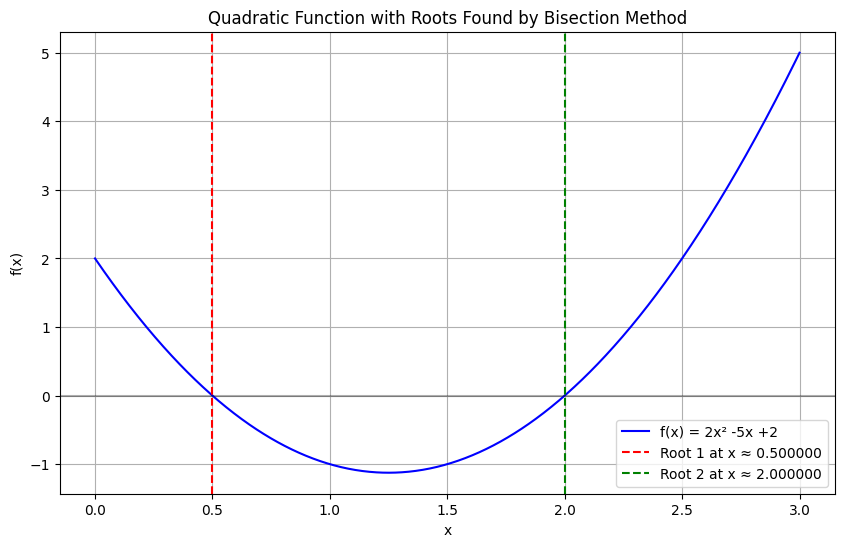

In [ ]:
def f2(x, a, b, c):
    """Polynomial function a*x^2 + b*x + c"""
    return a*x**2 + b*x + c

# Find the root of the quadratic function 2x^2 - 5x + 2
# (which has roots at x = 0.5 and x = 2)
a, b, c = 2, -5, 2
root, iterations, error, converged = bisection_v3(f2, 0, 1, 1e-8, 100, a, b, c)

print(f"Root found: {root}")
print(f"Function value at root: {f2(root, a, b, c)}")
print(f"Iterations performed: {iterations}")
print(f"Estimated error: {error}")
print(f"Converged: {converged}")

# Try another root
root2, iterations2, error2, converged2 = bisection_v3(f2, 1, 3, 1e-8, 100, a, b, c)

print(f"\nSecond root found: {root2}")
print(f"Function value at root: {f2(root2, a, b, c)}")
print(f"Iterations performed: {iterations2}")
print(f"Estimated error: {error2}")
print(f"Converged: {converged2}")

# Visualize the function and both roots
x = np.linspace(0, 3, 1000)
y = f2(x, a, b, c)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label=f'f(x) = {a}x² {b:+}x {c:+}')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=root, color='r', linestyle='--', label=f'Root 1 at x ≈ {root:.6f}')
plt.axvline(x=root2, color='g', linestyle='--', label=f'Root 2 at x ≈ {root2:.6f}')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic Function with Roots Found by Bisection Method')
plt.legend()
plt.show()

## Relationship Between Iteration Count and Stopping Tolerance

Now, let's create a visualization to understand how the iteration count changes as we reduce the tolerance. This helps us understand the efficiency of the bisection method.

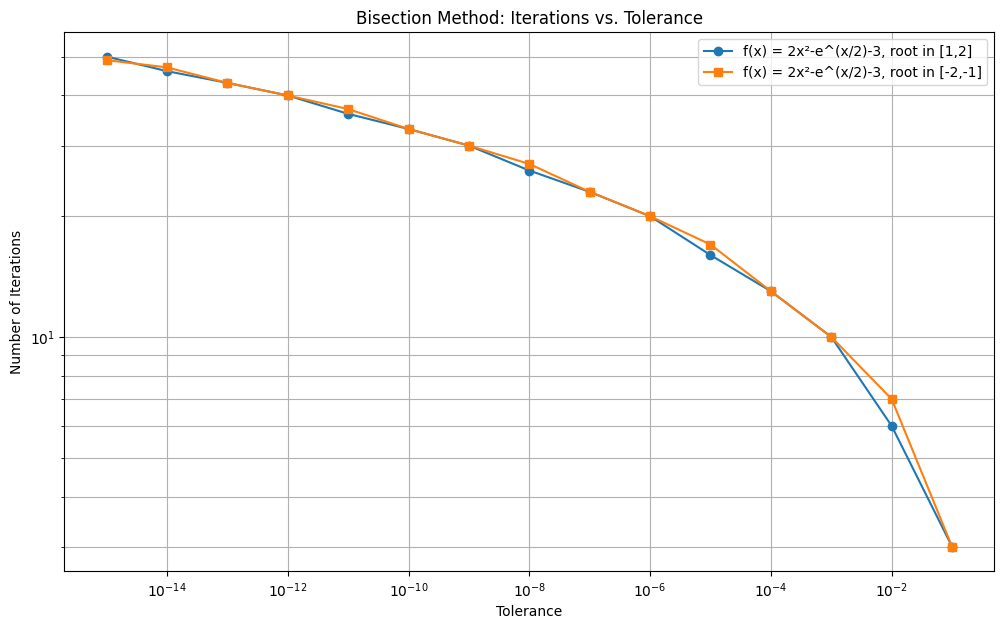

In [ ]:
def study_tolerance_vs_iterations(f, a, b, tol_range, *args):
    """
    Study how iteration count varies with tolerance.

    Parameters:
    f : function
        The function for which we want to find the root
    a, b : float
        The interval [a, b] where we search for the root
    tol_range : array-like
        Range of tolerance values to test
    *args : additional arguments
        Additional arguments to pass to function f

    Returns:
    tuple: (tolerance_values, iteration_counts)
    """
    tolerance_values = []
    iteration_counts = []

    for tol in tol_range:
        _, iterations, _, _ = bisection_v3(f, a, b, tol, 1000, *args)
        tolerance_values.append(tol)
        iteration_counts.append(iterations)

    return tolerance_values, iteration_counts

# Set up a range of tolerance values (logarithmic scale)
tolerances = np.logspace(-15, -1, 15)  # From 10^-15 to 10^-1

# Study iteration count for different functions
tol_values1, iter_counts1 = study_tolerance_vs_iterations(f1, 1, 2, tolerances)
tol_values2, iter_counts2 = study_tolerance_vs_iterations(f1, -2, -1, tolerances)

# Plot the results
plt.figure(figsize=(12, 7))
plt.loglog(tol_values1, iter_counts1, 'o-', label='f(x) = 2x²-e^(x/2)-3, root in [1,2]')
plt.loglog(tol_values2, iter_counts2, 's-', label='f(x) = 2x²-e^(x/2)-3, root in [-2,-1]')

plt.grid(True, which="both", ls="-")
plt.xlabel('Tolerance')
plt.ylabel('Number of Iterations')
plt.title('Bisection Method: Iterations vs. Tolerance')
plt.legend()
plt.show()

### Theoretical Relationship

The theoretical relationship between tolerance and the number of iterations in the bisection method is:

$$\text{iterations} \approx \log_2 \left(\frac{b-a}{\text{tolerance}}\right)$$

Let's verify this relationship by plotting the theoretical line alongside our observed data.

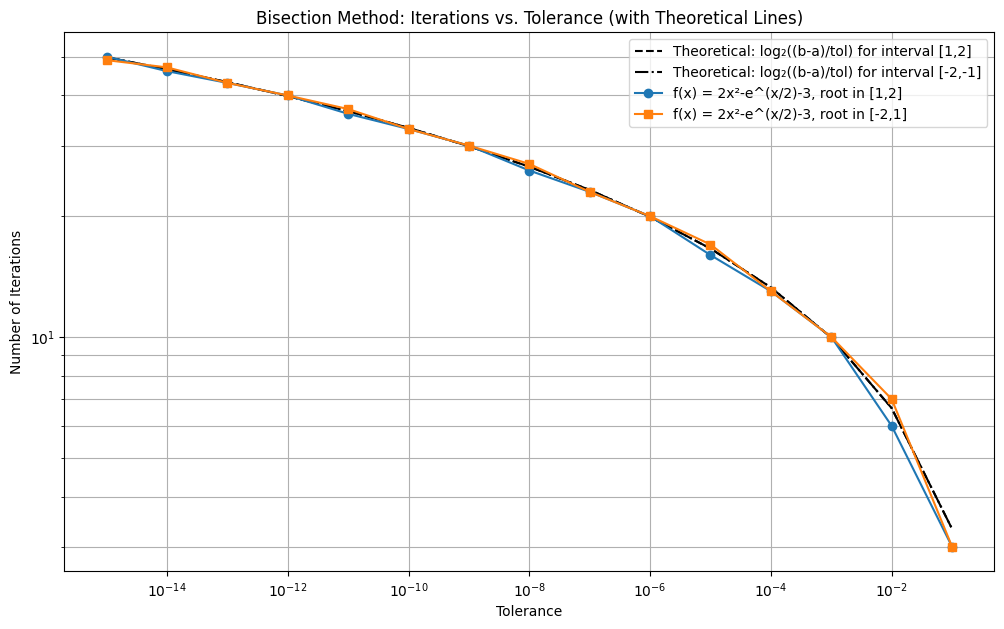

In [ ]:
# Calculate theoretical iterations for each function
tolerance_values = np.array(tol_values1)
theoretical_iter1 = np.log2((2 - 1) / tolerance_values)  # For f1, interval [1, 2]
theoretical_iter2 = np.log2((-1 - -2) / tolerance_values)  # For f2, interval [-2, -1]

plt.figure(figsize=(12, 7))
plt.loglog(tolerance_values, theoretical_iter1, 'k--', label='Theoretical: log₂((b-a)/tol) for interval [1,2]')
plt.loglog(tolerance_values, theoretical_iter2, 'k-.', label='Theoretical: log₂((b-a)/tol) for interval [-2,-1]')
plt.loglog(tol_values1, iter_counts1, 'o-', label='f(x) = 2x²-e^(x/2)-3, root in [1,2]')
plt.loglog(tol_values2, iter_counts2, 's-', label='f(x) = 2x²-e^(x/2)-3, root in [-2,1]')
plt.grid(True, which="both", ls="-")
plt.xlabel('Tolerance')
plt.ylabel('Number of Iterations')
plt.title('Bisection Method: Iterations vs. Tolerance (with Theoretical Lines)')
plt.legend()
plt.show()

## Summary

In this notebook, we developed the bisection method through three progressive implementations:

1. A basic implementation with minimal features
2. An improved version with parameter validation and defaults
3. A general-purpose version supporting additional function parameters

We also analyzed how the iteration count scales with tolerance, confirming the theoretical relationship:
$$\text{iterations} \approx \log_2 \left(\frac{b-a}{\text{tolerance}}\right)$$

Key observations:
- The bisection method is reliable but converges linearly (logarithmically with tolerance)
- For each step, we reduce the uncertainty by a factor of 2
- The initial interval size significantly affects the number of iterations required
- The method is guaranteed to converge for continuous functions with sign changes

For more complex functions or faster convergence, consider other root-finding methods like Newton-Raphson or the secant method, which typically have faster convergence rates.

##Bonus Challenge
Come up with your own roots problem and test the theoretical relationship by modifying the codeblocks above. Hint: Think of a function that has $x$ both inside and outside of a trig function, logarithm, etc...Generate a graph to see if/where the roots exist. Adjust parameter values or add offset if the function never crosses y = 0.